In [0]:
import sys
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
dataroot = "/content/drive/My Drive/Colab Notebooks/burgers/data/"
sys.path.append("/content/drive/My Drive/Colab Notebooks/burgers/")

Mounted at /content/drive


In [0]:
import numpy as np
import torch
from matplotlib import pylab as plt
print(torch.cuda.device_count())
device = torch.device('cuda')

1


In [0]:
data = np.load(dataroot+"heat.npz")

In [0]:
model = torch.nn.Sequential(
    torch.nn.Conv1d(1,15,3),
    torch.nn.ReLU(),
    torch.nn.Conv1d(15,15,1),
    torch.nn.ReLU(),
    torch.nn.Conv1d(15,15,1),
    torch.nn.ReLU(),
    torch.nn.Conv1d(15,1,1)
)
loss = torch.nn.MSELoss()

In [0]:
model = torch.nn.Sequential(
    torch.nn.Conv1d(1,1,3),
)
loss = torch.nn.MSELoss()

In [0]:
import util

In [0]:
util.count_parameters(model)

4

In [0]:
dataset = torch.tensor(data['U'],dtype=torch.float32,device=device)

In [0]:
Ntraj, Nt, Nx = dataset.shape

In [0]:
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
model = model.to(device)

In [0]:

Nepoch = 10000
Nbatch = 10
Nprint = 10
for e in range(Nepoch//Nbatch):
    xx,yy = util.get_batch(Nbatch, dataset)
    y_pred = model(xx)+xx[:,:,1:-1]
    L = loss(y_pred,yy[:,:,1:-1])
    if e%Nprint == Nprint-1:
        print(e,L.item())
    optimizer.zero_grad()
    L.backward()
    optimizer.step()

9 0.41470879316329956
19 2.86376690864563
29 10.746926307678223
39 6.913177967071533
49 0.7641254663467407
59 6.789406776428223
69 0.4258002042770386
79 3.308464288711548
89 4.325918674468994
99 20.662771224975586
109 9.364238739013672
119 19.287736892700195
129 1.084417462348938
139 11.426679611206055
149 0.8742179274559021
159 1.6425617933273315
169 28.135791778564453
179 26.992712020874023
189 0.9944060444831848
199 10.627538681030273
209 17.934316635131836
219 0.6258082389831543
229 4.882753372192383
239 0.3190555274486542
249 0.5595388412475586
259 0.30538320541381836
269 0.8626018166542053
279 2.586857795715332
289 29.359251022338867
299 10.342996597290039
309 15.612226486206055
319 1.7187718152999878
329 1.1258610486984253
339 1.4054737091064453
349 1.6600241661071777
359 10.72286319732666
369 0.9190042614936829
379 0.49173352122306824
389 2.4144952297210693
399 2.7605509757995605
409 25.293943405151367
419 0.4906776547431946
429 6.953236103057861
439 6.239734649658203
449 27.11

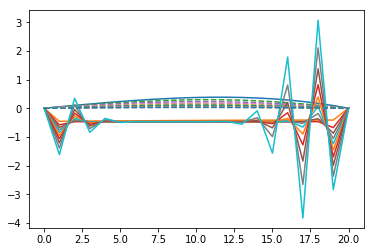

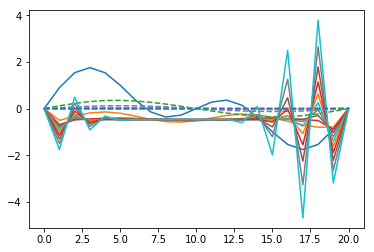

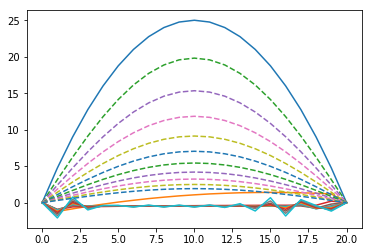

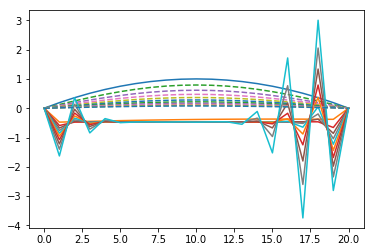

In [0]:
for j in range(Ntraj):
    util.do_a_path(model, dataset, j)

In [0]:
list(model.parameters())

[Parameter containing:
 tensor([[[-0.2394, -0.2017, -0.5057]]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([-0.4451], device='cuda:0', requires_grad=True)]